# Modelling

In this notebook I'll be starting the modelling phase of my project.

In [19]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np

## Data Loading

In [20]:
X_train_s = pd.read_pickle('X_train_s.pkl')
X_val_s = pd.read_pickle('X_val_s.pkl')
X_test_s = pd.read_pickle('X_test_s.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_val = pd.read_pickle('y_val.pkl')
y_test = pd.read_pickle('y_test.pkl')


Data has been loaded.

## Linear Regression

The first step in Modelling for my project will be a baseline linear regression model.

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train_s,y_train)



DecisionTreeRegressor()

In [38]:
print(dtr.score(X_train_s,y_train))
print(dtr.score(X_val_s,y_val))

0.9999959856345546
0.8539960900474031


In [26]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

#instantiate
LinReg=LinearRegression()

#fit
LinReg.fit(X_train_s,y_train)

#Score
#Train
print(LinReg.score(X_train_s,y_train))

#Val
print(LinReg.score(X_val_s,y_val))

0.6933292459120329
-1.6230008020139474e+21


In [33]:
import matplotlib.pyplot as plt

(array([5.2603e+04, 2.1849e+04, 5.2660e+03, 1.8570e+03, 7.2600e+02,
        2.7100e+02, 9.3000e+01, 9.6000e+01, 2.9000e+01, 1.7000e+01]),
 array([-6.87946665e+06,  3.93028695e+06,  1.47400405e+07,  2.55497941e+07,
         3.63595477e+07,  4.71693013e+07,  5.79790549e+07,  6.87888085e+07,
         7.95985621e+07,  9.04083157e+07,  1.01218069e+08]),
 <BarContainer object of 10 artists>)

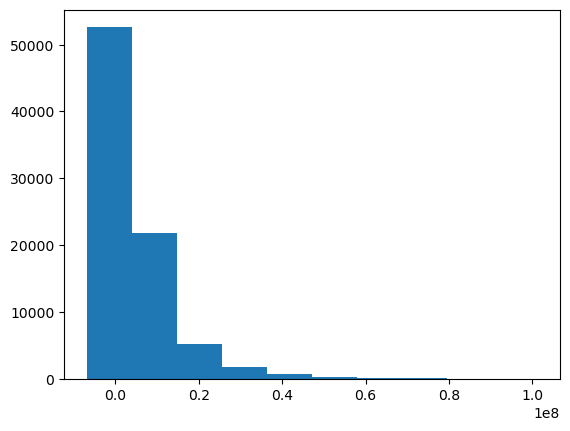

In [36]:
plt.hist(LinReg.predict(X_train_s))

In [24]:
X_train_s[:5]

,player_id,last_season_x,most_recent_club_id,height_in_cm,highest_ever_market_value,age,contract_days_left,month,year,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,net_transfer_record,national_team_players,foot_both,foot_left,foot_right,position_Attack,position_Defender,position_Goalkeeper,position_Midfield,sub_position_Attacking Midfield,sub_position_Central Midfield,sub_position_Centre-Back,sub_position_Centre-Forward,sub_position_Defensive Midfield,sub_position_Goalkeeper,sub_position_Left Midfield,sub_position_Left Winger,sub_position_Left-Back,sub_position_Right Midfield,sub_position_Right Winger,sub_position_Right-Back,sub_position_Second Striker,league_id_BE1,league_id_DK1,league_id_ES1,league_id_FR1,league_id_GB1,league_id_GR1,league_id_IT1,league_id_L1,league_id_NL1,league_id_PO1,league_id_RU1,league_id_SC1,league_id_TR1,league_id_UKR1,Country_Algeria,Country_Argentina,Country_Austria,Country_Belgium,Country_Bosnia-Herzegovina,Country_Brazil,Country_Cameroon,Country_Colombia,Country_Cote d'Ivoire,Country_Croatia,Country_Denmark,Country_England,Country_France,Country_Germany,Country_Ghana,Country_Greece,Country_Italy,Country_Japan,Country_Morocco,Country_Netherlands,Country_Nigeria,Country_Norway,Country_Other,Country_Poland,Country_Portugal,Country_Russia,Country_Scotland,Country_Senegal,Country_Serbia,Country_Spain,Country_Sweden,Country_Switzerland,Country_Turkey,Country_Ukraine,Country_United States,Country_Uruguay
0,-0.750024,0.251602,-0.287729,0.260554,0.440320,-0.260559,0.325471,-0.118134,-0.230274,-0.532255,-0.612944,-0.960436,-0.258501,-1.272918,-0.402521,-1.179271,1.592686,-0.203311,-0.577466,0.638745,-0.635055,1.407452,-0.297908,-0.647845,-0.278415,-0.372249,-0.471025,-0.409022,-0.308428,-0.297908,-0.08579,-0.270477,-0.280248,-0.088741,-0.272835,3.366797,-0.08162,-0.273473,-0.214427,-0.336596,-0.302735,-0.307064,-0.239946,3.105410,-0.305838,-0.294943,-0.299443,-0.252851,-0.186729,-0.299419,-0.210077,-0.079955,-0.150498,-0.084712,-0.195354,-0.07934,-0.230279,-0.07841,-0.083767,-0.09586,-0.109324,-0.188041,-0.200363,-0.250382,-0.222138,-0.091532,-0.182426,4.649590,-0.078954,-0.101536,-0.231961,-0.102262,-0.085933,-0.411994,-0.094699,-0.223601,-0.205683,-0.141303,-0.10675,-0.121109,-0.294556,-0.100928,-0.086714,-0.23248,-0.19552,-0.074985,-0.099514
1,-0.464942,-0.183373,-0.320548,-0.337849,-0.304066,-1.262690,-1.223367,-1.511990,-1.237884,-0.262411,-0.612944,-0.960436,-0.258501,-1.136201,-0.383949,1.134991,0.082045,-0.203311,-0.577466,0.638745,1.574668,-0.710504,-0.297908,-0.647845,-0.278415,-0.372249,-0.471025,-0.409022,-0.308428,-0.297908,-0.08579,3.697173,-0.280248,-0.088741,-0.272835,-0.297018,-0.08162,-0.273473,-0.214427,2.970924,-0.302735,-0.307064,-0.239946,-0.322019,-0.305838,-0.294943,-0.299443,-0.252851,-0.186729,-0.299419,-0.210077,-0.079955,-0.150498,-0.084712,-0.195354,-0.07934,-0.230279,-0.07841,-0.083767,-0.09586,-0.109324,-0.188041,-0.200363,-0.250382,-0.222138,-0.091532,-0.182426,-0.215073,-0.078954,-0.101536,-0.231961,-0.102262,-0.085933,-0.411994,-0.094699,-0.223601,-0.205683,-0.141303,-0.10675,-0.121109,3.394943,-0.100928,-0.086714,-0.23248,-0.19552,-0.074985,-0.099514
2,-0.535743,0.251602,-0.331589,0.709356,-0.332696,0.240506,-0.447889,-0.118134,-0.230274,0.007433,-0.612944,1.148781,-0.258501,-0.493237,-0.324004,0.333498,-0.673275,-0.203311,-0.577466,0.638745,-0.635055,-0.710504,-0.297908,1.543580,-0.278415,2.686375,-0.471025,-0.409022,-0.308428,-0.297908,-0.08579,-0.270477,-0.280248,-0.088741,-0.272835,-0.297018,-0.08162,-0.273473,-0.214427,-0.336596,3.303218,-0.307064,-0.239946,-0.322019,-0.305838,-0.294943,-0.299443,-0.252851,-0.186729,-0.299419,-0.210077,-0.079955,-0.150498,-0.084712,-0.195354,-0.07934,-0.230279,-0.07841,-0.083767,-0.09586,-0.109324,-0.188041,-0.200363,-0.250382,-0.222138,-0.091532,-0.182426,-0.215073,-0.078954,-0.101536,-0.231961,-0.102262,-0.085933,2.427220,-0.094699,-0.223601,-0.205683,-0.141303,-0.10675,-0.121109,-0.294556,-0.100928,-0.086714,-0

In [29]:
 X_val_s.isna().sum().sum()

0